Comparison of electromagnetic model
=========================================

__Goal__:
 Run SMRT for different electromagnetic theories in two contexts:

 - with sticky_hard_spheres microstructure, it is possible to compare iba, dmrt_qca_shortrange, dmrt_qcacp_shortrange and rayleigh
 - with exponential microstructure, it is possible to compare iba and sft_rayleigh
  
In this exercise, run SMRT for a snowpack with varying radius for the different electromagnetic theories. Plot the result as a function of radius (see sensitivity_study tutorial).

__Learning__: 
 
 - In a second step, we'll learn how to compute scattering coefficient, without running the full model



In [13]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib notebook

from smrt import make_model, make_snowpack, sensor_list

Electromagnetic models compatible with spheres
----------------------------------------------------------------------

In [14]:
# prepare the snowpack

thickness = [10]
density = 350
temperature = 270
stickiness = 0.15

radius_list = np.arange(50, 400, 10) * 1e-6

snowpack_list = [make_snowpack(thickness=thickness, microstructure_model='sticky_hard_spheres',
                   radius=r, density=density, temperature=temperature, stickiness=stickiness) for r in radius_list]

In [15]:
# prepare the sensor
sensor = sensor_list.passive(37e9, 55)

In [16]:
# prepare several models

m_iba = make_model("iba", "dort")
m_dmrt_qca = make_model("dmrt_qca_shortrange", "dort")
# continue by adding more model, runing and ploting the results as in sensitivity_study

Electromagnetic models compatible with exponential microstructure
----------------------------------------------------------------------

At the moment only iba and sft_rayleigh can run with exponential microstructure.

In [17]:
# prepare the snowpack

thickness = [10]
density = 350
temperature = 270

corr_length_list = np.arange(20, 200, 10) * 1e-6

snowpack_list = [make_snowpack(thickness=thickness, microstructure_model='exponential',
                   corr_length=c, density=density, temperature=temperature) for c in corr_length_list]

In [18]:
m_iba = make_model("iba", "dort")
m_slf = make_model("sft_rayleigh", "dort")

In [19]:
# continue with running these models and plotting the results as before

Computing scattering coefficient
--------------------------------------
Running the full model is interesting but sometimes we only want the scattering coefficient (or absorption coefficient). There are two ways to get it.
First option is the access the "emmodel" attribute of the model and run it on a layer (not on a snowpack)


In [20]:
firstlayer = snowpack_list[0].layers[0]  # this is the first layer of the first snowpack

m_iba.emmodel(sensor, firstlayer).ks

0.0018984844770258463

<IPython.core.display.Javascript object>


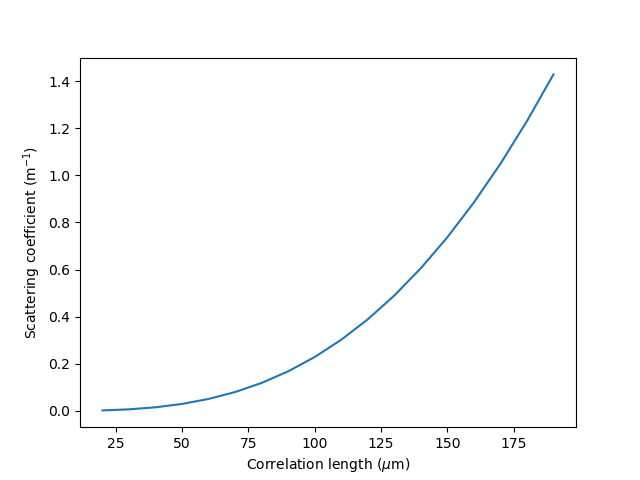

Text(0,0.5,'Scattering coefficient (m$^{-1}$)')

In [21]:
#to compute ks of all snowpack a simple

ks_iba = [m_iba.emmodel(sensor, sp.layers[0]).ks for sp in snowpack_list]
plt.figure()
plt.plot(corr_length_list*1e6, ks_iba)
plt.xlabel("Correlation length ($\mu$m)")
plt.ylabel("Scattering coefficient (m$^{-1}$)")


Second option is without the overhead of make_model. It is simpler when the full model is not needed

In [22]:
# need a new import
from smrt import make_emmodel

In [23]:
# then, make the EM model
em_iba = make_emmodel("iba", sensor, firstlayer)
# get ks
em_iba.ks

0.0018984844770258463